In [3]:
from sklearn.linear_model import Perceptron
from sklearn import model_selection
import matplotlib.pyplot as plt
import numpy as np
import warnings
import pandas as pd
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_auc_score
import random
import torch
from torch import nn, optim

Accuracy: 0.5975
AUC: 0.7783


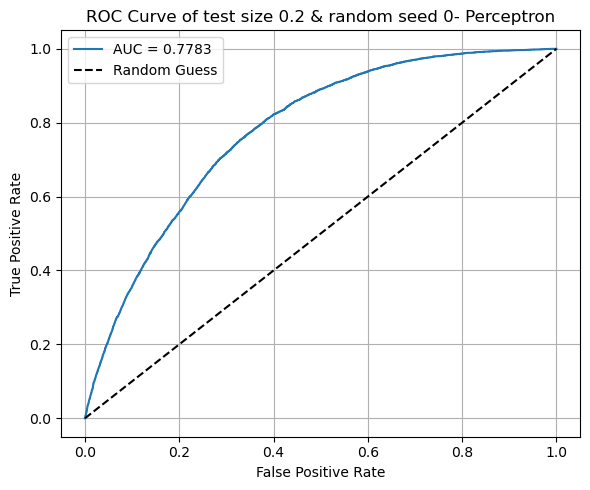

In [7]:
# Question 1: test_size = 0.2 & random_state = 0
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
seed = 0
random.seed(seed)

df = pd.read_csv('diabetes - Copy.csv')
df = df.dropna()

df['Zodiac_1'] = (df['Zodiac'] == 1).astype(int)
df['Zodiac_2'] = (df['Zodiac'] == 2).astype(int)   
df['Zodiac_3'] = (df['Zodiac'] == 3).astype(int)
df['Zodiac_4'] = (df['Zodiac'] == 4).astype(int)
df['Zodiac_5'] = (df['Zodiac'] == 5).astype(int)
df['Zodiac_6'] = (df['Zodiac'] == 6).astype(int)
df['Zodiac_7'] = (df['Zodiac'] == 7).astype(int)
df['Zodiac_8'] = (df['Zodiac'] == 8).astype(int)
df['Zodiac_9'] = (df['Zodiac'] == 9).astype(int)
df['Zodiac_10'] = (df['Zodiac'] == 10).astype(int)
df['Zodiac_11'] = (df['Zodiac'] == 11).astype(int)
df['Zodiac_12'] = (df['Zodiac'] == 12).astype(int)

df['BiologicalSex'] = df['BiologicalSex'].apply(lambda x:x - 1)

df = df.drop(['Zodiac','Zodiac_1'],axis = 1)

train_data, val_data = train_test_split(df, test_size=0.2, random_state=seed)
X_train = train_data.drop('Diabetes', axis=1)
y_train = train_data['Diabetes']
X_val = val_data.drop('Diabetes', axis=1)
y_val = val_data['Diabetes']

continuous_variables = ['BMI','MentalHealth','PhysicalHealth','GeneralHealth','AgeBracket','EducationBracket','IncomeBracket']
mean_std = X_train[continuous_variables].agg(['mean', 'std'], axis=0)
means = mean_std.loc['mean']
stds = mean_std.loc['std']

X_train[continuous_variables] = (X_train[continuous_variables] - means) / stds
X_val[continuous_variables] = (X_val[continuous_variables] - means) / stds

clf = Perceptron(tol=1e-3, shuffle=True, class_weight = 'balanced')
clf.fit(X_train, y_train)

acc = clf.score(X_val, y_val)
y_scores = clf.decision_function(X_val)
roc_auc = roc_auc_score(y_val, y_scores)
        
print(f"Accuracy: {acc:.4f}")
print(f"AUC: {roc_auc:.4f}")

fpr, tpr, thresholds = roc_curve(y_val, y_scores)

# Plot
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve of test size 0.2 & random seed 0- Perceptron")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Accuracy: 0.6830
AUC: 0.7717


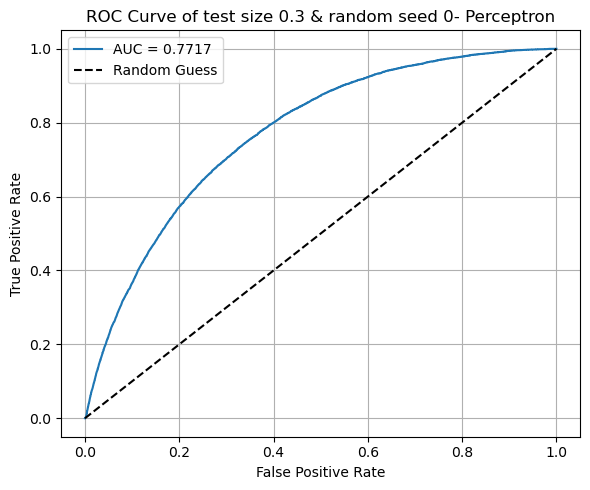

In [9]:
# Question 1: test_size = 0.3 & random_state = 0
seed = 0
random.seed(seed)

df = pd.read_csv('diabetes - Copy.csv')
df = df.dropna()

df['Zodiac_1'] = (df['Zodiac'] == 1).astype(int)
df['Zodiac_2'] = (df['Zodiac'] == 2).astype(int)   
df['Zodiac_3'] = (df['Zodiac'] == 3).astype(int)
df['Zodiac_4'] = (df['Zodiac'] == 4).astype(int)
df['Zodiac_5'] = (df['Zodiac'] == 5).astype(int)
df['Zodiac_6'] = (df['Zodiac'] == 6).astype(int)
df['Zodiac_7'] = (df['Zodiac'] == 7).astype(int)
df['Zodiac_8'] = (df['Zodiac'] == 8).astype(int)
df['Zodiac_9'] = (df['Zodiac'] == 9).astype(int)
df['Zodiac_10'] = (df['Zodiac'] == 10).astype(int)
df['Zodiac_11'] = (df['Zodiac'] == 11).astype(int)
df['Zodiac_12'] = (df['Zodiac'] == 12).astype(int)

df['BiologicalSex'] = df['BiologicalSex'].apply(lambda x:x - 1)

df = df.drop(['Zodiac','Zodiac_1'],axis = 1)

train_data, val_data = train_test_split(df, test_size=0.3, random_state=seed)
X_train = train_data.drop('Diabetes', axis=1)
y_train = train_data['Diabetes']
X_val = val_data.drop('Diabetes', axis=1)
y_val = val_data['Diabetes']

continuous_variables = ['BMI','MentalHealth','PhysicalHealth','GeneralHealth','AgeBracket','EducationBracket','IncomeBracket']
mean_std = X_train[continuous_variables].agg(['mean', 'std'], axis=0)
means = mean_std.loc['mean']
stds = mean_std.loc['std']

X_train[continuous_variables] = (X_train[continuous_variables] - means) / stds
X_val[continuous_variables] = (X_val[continuous_variables] - means) / stds


clf = Perceptron(tol=1e-3, shuffle=True, class_weight = 'balanced')
clf.fit(X_train, y_train)

acc = clf.score(X_val, y_val)
y_scores = clf.decision_function(X_val)
roc_auc = roc_auc_score(y_val, y_scores)
        
print(f"Accuracy: {acc:.4f}")
print(f"AUC: {roc_auc:.4f}")

fpr, tpr, thresholds = roc_curve(y_val, y_scores)

# Plot
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve of test size 0.3 & random seed 0- Perceptron")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Accuracy: 0.5973
AUC: 0.5669


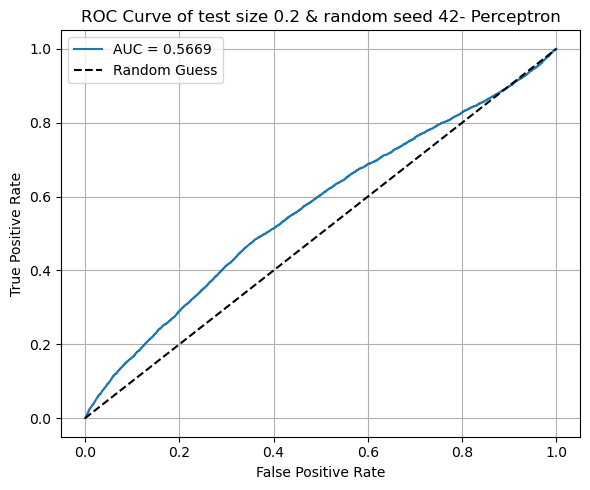

In [11]:
# Question 1: test_size = 0.2 & random_state = 42
seed = 42
random.seed(seed)

df = pd.read_csv('diabetes - Copy.csv')
df = df.dropna()

df['Zodiac_1'] = (df['Zodiac'] == 1).astype(int)
df['Zodiac_2'] = (df['Zodiac'] == 2).astype(int)   
df['Zodiac_3'] = (df['Zodiac'] == 3).astype(int)
df['Zodiac_4'] = (df['Zodiac'] == 4).astype(int)
df['Zodiac_5'] = (df['Zodiac'] == 5).astype(int)
df['Zodiac_6'] = (df['Zodiac'] == 6).astype(int)
df['Zodiac_7'] = (df['Zodiac'] == 7).astype(int)
df['Zodiac_8'] = (df['Zodiac'] == 8).astype(int)
df['Zodiac_9'] = (df['Zodiac'] == 9).astype(int)
df['Zodiac_10'] = (df['Zodiac'] == 10).astype(int)
df['Zodiac_11'] = (df['Zodiac'] == 11).astype(int)
df['Zodiac_12'] = (df['Zodiac'] == 12).astype(int)

df['BiologicalSex'] = df['BiologicalSex'].apply(lambda x:x - 1)

df = df.drop(['Zodiac','Zodiac_1'],axis = 1)

train_data, val_data = train_test_split(df, test_size=0.2, random_state=seed)
X_train = train_data.drop('Diabetes', axis=1)
y_train = train_data['Diabetes']
X_val = val_data.drop('Diabetes', axis=1)
y_val = val_data['Diabetes']

continuous_variables = ['BMI','MentalHealth','PhysicalHealth','GeneralHealth','AgeBracket','EducationBracket','IncomeBracket']
mean_std = X_train[continuous_variables].agg(['mean', 'std'], axis=0)
means = mean_std.loc['mean']
stds = mean_std.loc['std']

X_train[continuous_variables] = (X_train[continuous_variables] - means) / stds
X_val[continuous_variables] = (X_val[continuous_variables] - means) / stds


clf = Perceptron(tol=1e-3, shuffle=True, class_weight = 'balanced')
clf.fit(X_train, y_train)

acc = clf.score(X_val, y_val)
y_scores = clf.decision_function(X_val)
roc_auc = roc_auc_score(y_val, y_scores)
        
print(f"Accuracy: {acc:.4f}")
print(f"AUC: {roc_auc:.4f}")

fpr, tpr, thresholds = roc_curve(y_val, y_scores)

# Plot
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve of test size 0.2 & random seed 42- Perceptron")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Accuracy: 0.7773
AUC: 0.7721


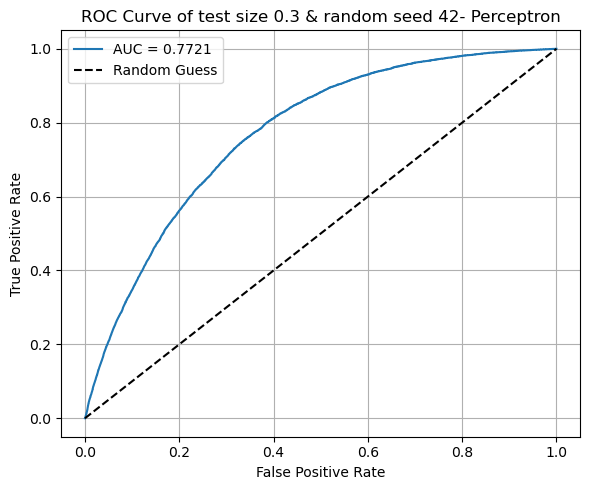

In [13]:
# Question 1: test_size = 0.3 & random_state = 42
seed = 42
random.seed(seed)

df = pd.read_csv('diabetes - Copy.csv')
df = df.dropna()

df['Zodiac_1'] = (df['Zodiac'] == 1).astype(int)
df['Zodiac_2'] = (df['Zodiac'] == 2).astype(int)   
df['Zodiac_3'] = (df['Zodiac'] == 3).astype(int)
df['Zodiac_4'] = (df['Zodiac'] == 4).astype(int)
df['Zodiac_5'] = (df['Zodiac'] == 5).astype(int)
df['Zodiac_6'] = (df['Zodiac'] == 6).astype(int)
df['Zodiac_7'] = (df['Zodiac'] == 7).astype(int)
df['Zodiac_8'] = (df['Zodiac'] == 8).astype(int)
df['Zodiac_9'] = (df['Zodiac'] == 9).astype(int)
df['Zodiac_10'] = (df['Zodiac'] == 10).astype(int)
df['Zodiac_11'] = (df['Zodiac'] == 11).astype(int)
df['Zodiac_12'] = (df['Zodiac'] == 12).astype(int)

df['BiologicalSex'] = df['BiologicalSex'].apply(lambda x:x - 1)

df = df.drop(['Zodiac','Zodiac_1'],axis = 1)

train_data, val_data = train_test_split(df, test_size=0.3, random_state=seed)
X_train = train_data.drop('Diabetes', axis=1)
y_train = train_data['Diabetes']
X_val = val_data.drop('Diabetes', axis=1)
y_val = val_data['Diabetes']

continuous_variables = ['BMI','MentalHealth','PhysicalHealth','GeneralHealth','AgeBracket','EducationBracket','IncomeBracket']
mean_std = X_train[continuous_variables].agg(['mean', 'std'], axis=0)
means = mean_std.loc['mean']
stds = mean_std.loc['std']

X_train[continuous_variables] = (X_train[continuous_variables] - means) / stds
X_val[continuous_variables] = (X_val[continuous_variables] - means) / stds


clf = Perceptron(tol=1e-3, shuffle=True, class_weight = 'balanced')
clf.fit(X_train, y_train)

acc = clf.score(X_val, y_val)
y_scores = clf.decision_function(X_val)
roc_auc = roc_auc_score(y_val, y_scores)
        
print(f"Accuracy: {acc:.4f}")
print(f"AUC: {roc_auc:.4f}")

fpr, tpr, thresholds = roc_curve(y_val, y_scores)

# Plot
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve of test size 0.3 & random seed 42- Perceptron")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

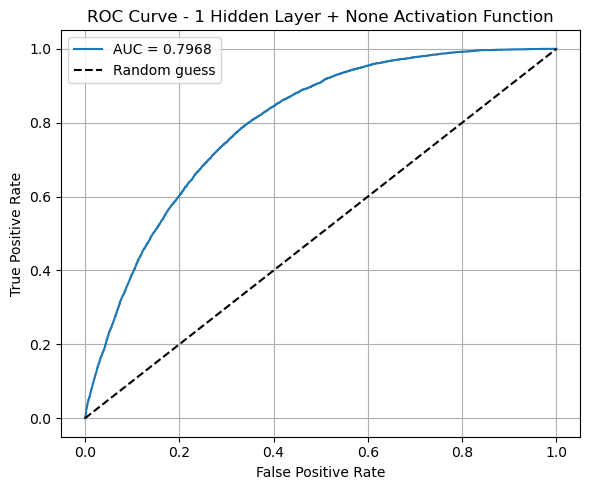

In [24]:
# Question 2: 1 hidden layer + none activation function
import torch
import torch.nn as nn
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split
from IPython import display

seed = 0
random.seed(seed)
torch.manual_seed(seed)

device = torch.device("cpu")

df = pd.read_csv("diabetes - Copy.csv")
df = df.dropna()

for i in range(1, 13):
    df[f'Zodiac_{i}'] = (df['Zodiac'] == i).astype(int)
df['BiologicalSex'] = df['BiologicalSex'] - 1
df = df.drop(['Zodiac', 'Zodiac_1'], axis=1)

train_data, val_data = train_test_split(df, test_size=0.2, random_state=seed)
X_train = train_data.drop('Diabetes', axis=1)
y_train = train_data['Diabetes']
X_val = val_data.drop('Diabetes', axis=1)
y_val = val_data['Diabetes']

continuous_variables = ['BMI','MentalHealth','PhysicalHealth','GeneralHealth','AgeBracket','EducationBracket','IncomeBracket']
mean_std = X_train[continuous_variables].agg(['mean', 'std'], axis=0)
means = mean_std.loc['mean']
stds = mean_std.loc['std']

X_train[continuous_variables] = (X_train[continuous_variables] - means) / stds
X_val[continuous_variables] = (X_val[continuous_variables] - means) / stds

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32, device=device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long, device=device)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32, device=device)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.long, device=device)


D = X_train.shape[1]
C = 2
H = 100
learning_rate = 1e-2
lambda_l2 = 1e-2
num_epochs = 100

model = nn.Sequential(
    nn.Linear(D, H),
    nn.Identity(),
    nn.Linear(H,C)
    
)

counts = torch.bincount(y_train_tensor)
weights = 1.0 / counts
criterion = nn.CrossEntropyLoss(weight=weights)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) # built-in L2

for t in range(num_epochs):
    model.train()
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    
    score, predicted = torch.max(y_pred, 1)
    acc = (predicted == y_train_tensor).sum().item() / len(y_train_tensor)
    
    print(f"[EPOCH {t}] LOSS: {loss.item():.6f} | ACC: {acc:.4f}")
    display.clear_output(wait=True)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

model.eval()
with torch.no_grad():
    y_logits = model(X_val_tensor)
    y_probs = torch.softmax(y_logits, dim=1)[:, 1].cpu().numpy()
    y_true = y_val_tensor.cpu().numpy()
    fpr, tpr, thresholds = roc_curve(y_true, y_probs)
    auc_score = roc_auc_score(y_true, y_probs)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - 1 Hidden Layer + None Activation Function")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

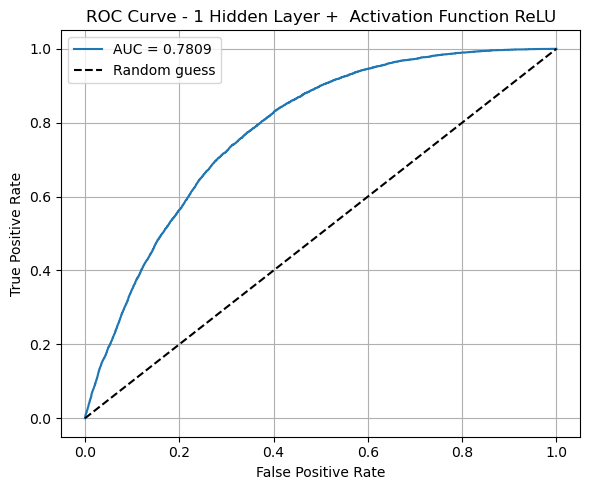

In [26]:
# Question 2: 1 hidden layer + activation function ReLU
import torch
import torch.nn as nn
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split
from IPython import display

seed = 0
random.seed(seed)
torch.manual_seed(seed)

device = torch.device("cpu")

df = pd.read_csv('diabetes - Copy.csv')
df = df.dropna()

for i in range(1, 13):
    df[f'Zodiac_{i}'] = (df['Zodiac'] == i).astype(int)
df['BiologicalSex'] = df['BiologicalSex'] - 1
df = df.drop(['Zodiac', 'Zodiac_1'], axis=1)

train_data, val_data = train_test_split(df, test_size=0.2, random_state=seed)
X_train = train_data.drop('Diabetes', axis=1)
y_train = train_data['Diabetes']
X_val = val_data.drop('Diabetes', axis=1)
y_val = val_data['Diabetes']

continuous_variables = ['BMI','MentalHealth','PhysicalHealth','GeneralHealth','AgeBracket','EducationBracket','IncomeBracket']
mean_std = X_train[continuous_variables].agg(['mean', 'std'], axis=0)
means = mean_std.loc['mean']
stds = mean_std.loc['std']

X_train[continuous_variables] = (X_train[continuous_variables] - means) / stds
X_val[continuous_variables] = (X_val[continuous_variables] - means) / stds

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32, device=device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long, device=device)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32, device=device)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.long, device=device)


D = X_train.shape[1]
C = 2
H = 100
learning_rate = 1e-2
lambda_l2 = 1e-2
num_epochs = 100

model = nn.Sequential(
    nn.Linear(D, H),
    nn.ReLU(),
    nn.Linear(H,C)
    
)

counts = torch.bincount(y_train_tensor)
weights = 1.0 / counts
criterion = nn.CrossEntropyLoss(weight=weights)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) # built-in L2

for t in range(num_epochs):
    model.train()
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    
    score, predicted = torch.max(y_pred, 1)
    acc = (predicted == y_train_tensor).sum().item() / len(y_train_tensor)
    
    print(f"[EPOCH {t}] LOSS: {loss.item():.6f} | ACC: {acc:.4f}")
    display.clear_output(wait=True)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

model.eval()
with torch.no_grad():
    y_logits = model(X_val_tensor)
    y_probs = torch.softmax(y_logits, dim=1)[:, 1].cpu().numpy()
    y_true = y_val_tensor.cpu().numpy()
    fpr, tpr, thresholds = roc_curve(y_true, y_probs)
    auc_score = roc_auc_score(y_true, y_probs)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - 1 Hidden Layer +  Activation Function ReLU")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

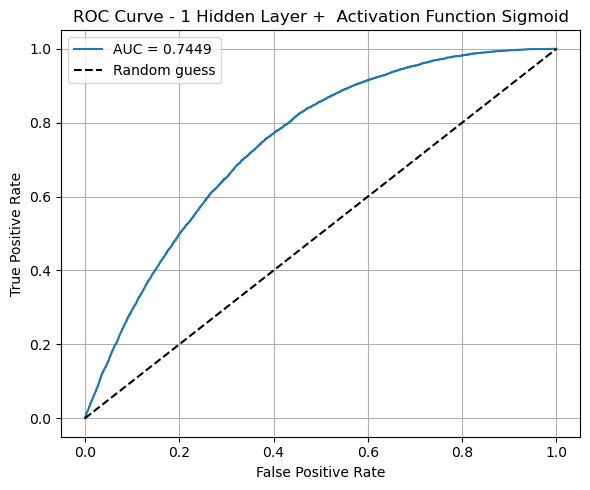

In [28]:
# Question 2: 1 hidden layer + activation function sigmoid
import torch
import torch.nn as nn
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split
from IPython import display

seed = 0
random.seed(seed)
torch.manual_seed(seed)

device = torch.device("cpu")

df = pd.read_csv('diabetes - Copy.csv')
df = df.dropna()

for i in range(1, 13):
    df[f'Zodiac_{i}'] = (df['Zodiac'] == i).astype(int)
df['BiologicalSex'] = df['BiologicalSex'] - 1
df = df.drop(['Zodiac', 'Zodiac_1'], axis=1)

train_data, val_data = train_test_split(df, test_size=0.2, random_state=seed)
X_train = train_data.drop('Diabetes', axis=1)
y_train = train_data['Diabetes']
X_val = val_data.drop('Diabetes', axis=1)
y_val = val_data['Diabetes']

continuous_variables = ['BMI','MentalHealth','PhysicalHealth','GeneralHealth','AgeBracket','EducationBracket','IncomeBracket']
mean_std = X_train[continuous_variables].agg(['mean', 'std'], axis=0)
means = mean_std.loc['mean']
stds = mean_std.loc['std']

X_train[continuous_variables] = (X_train[continuous_variables] - means) / stds
X_val[continuous_variables] = (X_val[continuous_variables] - means) / stds

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32, device=device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long, device=device)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32, device=device)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.long, device=device)

D = X_train.shape[1]
C = 2
H = 100
learning_rate = 1e-2
lambda_l2 = 1e-2
num_epochs = 100

model = nn.Sequential(
    nn.Linear(D, H),
    nn.Sigmoid(),
    nn.Linear(H,C)    
)

counts = torch.bincount(y_train_tensor)
weights = 1.0 / counts
criterion = nn.CrossEntropyLoss(weight=weights)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) # built-in L2

for t in range(num_epochs):
    model.train()
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    
    score, predicted = torch.max(y_pred, 1)
    acc = (predicted == y_train_tensor).sum().item() / len(y_train_tensor)
    
    print(f"[EPOCH {t}] LOSS: {loss.item():.6f} | ACC: {acc:.4f}")
    display.clear_output(wait=True)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

model.eval()
with torch.no_grad():
    y_logits = model(X_val_tensor)
    y_probs = torch.softmax(y_logits, dim=1)[:, 1].cpu().numpy()
    y_true = y_val_tensor.cpu().numpy()
    fpr, tpr, thresholds = roc_curve(y_true, y_probs)
    auc_score = roc_auc_score(y_true, y_probs)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - 1 Hidden Layer +  Activation Function Sigmoid")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

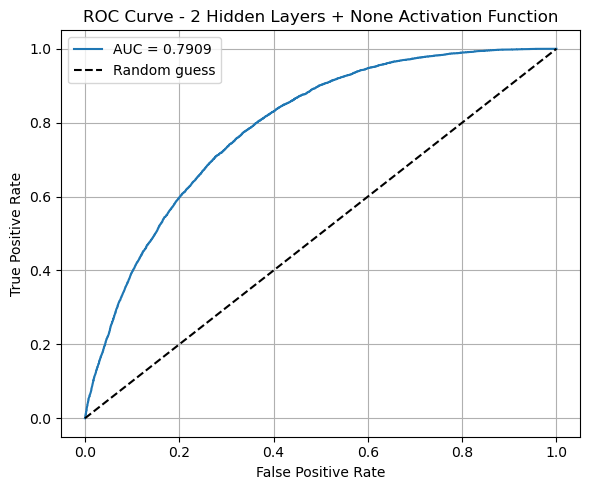

In [30]:
# Question 2: 2 hidden layers + none activation function
import torch
import torch.nn as nn
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split
from IPython import display

seed = 0
random.seed(seed)
torch.manual_seed(seed)

device = torch.device("cpu")

df = pd.read_csv('diabetes - Copy.csv')
df = df.dropna()

for i in range(1, 13):
    df[f'Zodiac_{i}'] = (df['Zodiac'] == i).astype(int)
df['BiologicalSex'] = df['BiologicalSex'] - 1
df = df.drop(['Zodiac', 'Zodiac_1'], axis=1)

train_data, val_data = train_test_split(df, test_size=0.2, random_state=seed)
X_train = train_data.drop('Diabetes', axis=1)
y_train = train_data['Diabetes']
X_val = val_data.drop('Diabetes', axis=1)
y_val = val_data['Diabetes']

continuous_variables = ['BMI','MentalHealth','PhysicalHealth','GeneralHealth','AgeBracket','EducationBracket','IncomeBracket']
mean_std = X_train[continuous_variables].agg(['mean', 'std'], axis=0)
means = mean_std.loc['mean']
stds = mean_std.loc['std']

X_train[continuous_variables] = (X_train[continuous_variables] - means) / stds
X_val[continuous_variables] = (X_val[continuous_variables] - means) / stds

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32, device=device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long, device=device)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32, device=device)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.long, device=device)


D = X_train.shape[1]
C = 2
H = 100
learning_rate = 1e-2
lambda_l2 = 1e-3
num_epochs = 100

model = nn.Sequential(
    nn.Linear(D, H),    
    nn.Identity(),           
    nn.Linear(H, H),     
    nn.Identity(),           
    nn.Linear(H, C)      
)

counts = torch.bincount(y_train_tensor)
weights = 1.0 / counts
criterion = nn.CrossEntropyLoss(weight=weights)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) # built-in L2

for t in range(num_epochs):
    model.train()
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    
    score, predicted = torch.max(y_pred, 1)
    acc = (predicted == y_train_tensor).sum().item() / len(y_train_tensor)
    
    print(f"[EPOCH {t}] LOSS: {loss.item():.6f} | ACC: {acc:.4f}")
    display.clear_output(wait=True)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

model.eval()
with torch.no_grad():
    y_logits = model(X_val_tensor)
    y_probs = torch.softmax(y_logits, dim=1)[:, 1].cpu().numpy()
    y_true = y_val_tensor.cpu().numpy()
    fpr, tpr, thresholds = roc_curve(y_true, y_probs)
    auc_score = roc_auc_score(y_true, y_probs)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - 2 Hidden Layers + None Activation Function")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

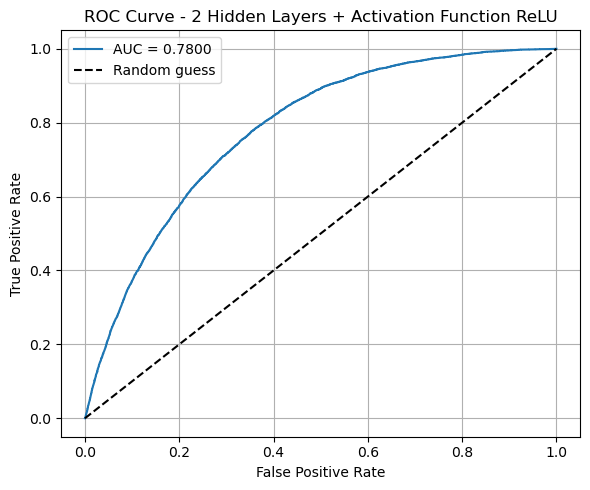

In [32]:
# Question 2: 2 hidden layers + activation function ReLU
import torch
import torch.nn as nn
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split
from IPython import display

seed = 0
random.seed(seed)
torch.manual_seed(seed)

device = torch.device("cpu")

df = pd.read_csv('diabetes - Copy.csv')
df = df.dropna()

for i in range(1, 13):
    df[f'Zodiac_{i}'] = (df['Zodiac'] == i).astype(int)
df['BiologicalSex'] = df['BiologicalSex'] - 1
df = df.drop(['Zodiac', 'Zodiac_1'], axis=1)

train_data, val_data = train_test_split(df, test_size=0.2, random_state=seed)
X_train = train_data.drop('Diabetes', axis=1)
y_train = train_data['Diabetes']
X_val = val_data.drop('Diabetes', axis=1)
y_val = val_data['Diabetes']

continuous_variables = ['BMI','MentalHealth','PhysicalHealth','GeneralHealth','AgeBracket','EducationBracket','IncomeBracket']
mean_std = X_train[continuous_variables].agg(['mean', 'std'], axis=0)
means = mean_std.loc['mean']
stds = mean_std.loc['std']

X_train[continuous_variables] = (X_train[continuous_variables] - means) / stds
X_val[continuous_variables] = (X_val[continuous_variables] - means) / stds

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32, device=device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long, device=device)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32, device=device)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.long, device=device)

D = X_train.shape[1]
C = 2
H = 100
learning_rate = 1e-2
lambda_l2 = 1e-3
num_epochs = 100

model = nn.Sequential(
    nn.Linear(D, H),    
    nn.ReLU(),           
    nn.Linear(H, H),     
    nn.ReLU(),           
    nn.Linear(H, C)      
)

counts = torch.bincount(y_train_tensor)
weights = 1.0 / counts
criterion = nn.CrossEntropyLoss(weight=weights)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) # built-in L2

for t in range(num_epochs):
    model.train()
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    
    score, predicted = torch.max(y_pred, 1)
    acc = (predicted == y_train_tensor).sum().item() / len(y_train_tensor)
    
    print(f"[EPOCH {t}] LOSS: {loss.item():.6f} | ACC: {acc:.4f}")
    display.clear_output(wait=True)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

model.eval()
with torch.no_grad():
    y_logits = model(X_val_tensor)
    y_probs = torch.softmax(y_logits, dim=1)[:, 1].cpu().numpy()
    y_true = y_val_tensor.cpu().numpy()
    fpr, tpr, thresholds = roc_curve(y_true, y_probs)
    auc_score = roc_auc_score(y_true, y_probs)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - 2 Hidden Layers + Activation Function ReLU")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

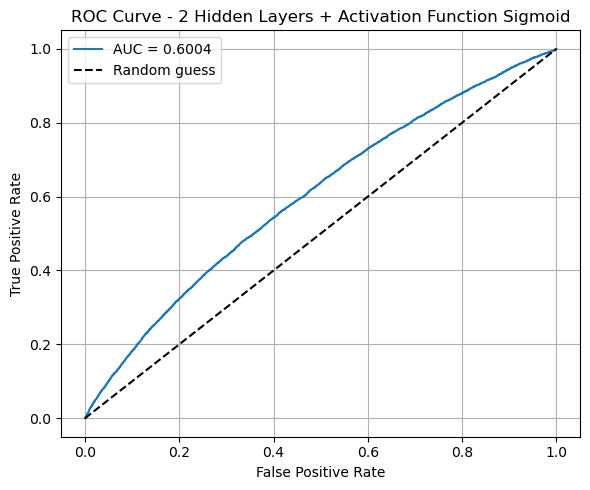

In [36]:
# Question 2: 2 hidden layers + activation function sigmoid
import torch
import torch.nn as nn
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split
from IPython import display

seed = 0
random.seed(seed)
torch.manual_seed(seed)

device = torch.device("cpu")

df = pd.read_csv('diabetes - Copy.csv')
df = df.dropna()

for i in range(1, 13):
    df[f'Zodiac_{i}'] = (df['Zodiac'] == i).astype(int)
df['BiologicalSex'] = df['BiologicalSex'] - 1
df = df.drop(['Zodiac', 'Zodiac_1'], axis=1)

train_data, val_data = train_test_split(df, test_size=0.2, random_state=seed)
X_train = train_data.drop('Diabetes', axis=1)
y_train = train_data['Diabetes']
X_val = val_data.drop('Diabetes', axis=1)
y_val = val_data['Diabetes']

continuous_variables = ['BMI','MentalHealth','PhysicalHealth','GeneralHealth','AgeBracket','EducationBracket','IncomeBracket']
mean_std = X_train[continuous_variables].agg(['mean', 'std'], axis=0)
means = mean_std.loc['mean']
stds = mean_std.loc['std']

X_train[continuous_variables] = (X_train[continuous_variables] - means) / stds
X_val[continuous_variables] = (X_val[continuous_variables] - means) / stds
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32, device=device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long, device=device)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32, device=device)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.long, device=device)

D = X_train.shape[1]
C = 2
H = 100
learning_rate = 1e-2
lambda_l2 = 1e-3
num_epochs = 100

model = nn.Sequential(
    nn.Linear(D, H),    
    nn.Sigmoid(),           
    nn.Linear(H, H),     
    nn.Sigmoid(),           
    nn.Linear(H, C)      
)

counts = torch.bincount(y_train_tensor)
weights = 1.0 / counts
criterion = nn.CrossEntropyLoss(weight=weights)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) # built-in L2

for t in range(num_epochs):
    model.train()
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    
    score, predicted = torch.max(y_pred, 1)
    acc = (predicted == y_train_tensor).sum().item() / len(y_train_tensor)
    
    print(f"[EPOCH {t}] LOSS: {loss.item():.6f} | ACC: {acc:.4f}")
    display.clear_output(wait=True)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

model.eval()
with torch.no_grad():
    y_logits = model(X_val_tensor)
    y_probs = torch.softmax(y_logits, dim=1)[:, 1].cpu().numpy()
    y_true = y_val_tensor.cpu().numpy()
    fpr, tpr, thresholds = roc_curve(y_true, y_probs)
    auc_score = roc_auc_score(y_true, y_probs)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - 2 Hidden Layers + Activation Function Sigmoid")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

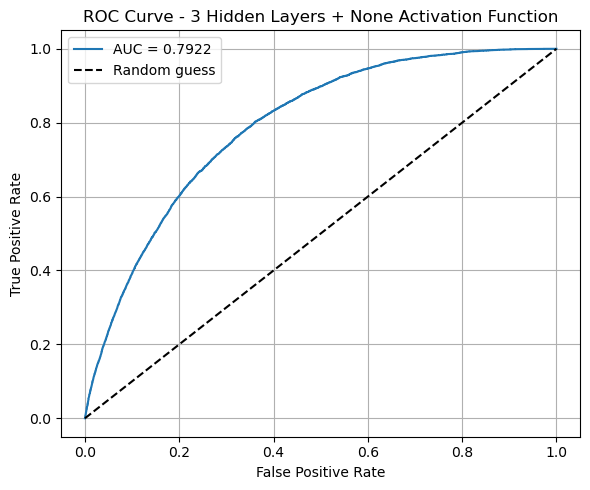

In [46]:
# Question 2: 3 hidden layers + none activation function
import torch
import torch.nn as nn
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split
from IPython import display

seed = 0
random.seed(seed)
torch.manual_seed(seed)

device = torch.device("cpu")

df = pd.read_csv('diabetes - Copy.csv')
df = df.dropna()

for i in range(1, 13):
    df[f'Zodiac_{i}'] = (df['Zodiac'] == i).astype(int)
df['BiologicalSex'] = df['BiologicalSex'] - 1
df = df.drop(['Zodiac', 'Zodiac_1'], axis=1)

train_data, val_data = train_test_split(df, test_size=0.2, random_state=seed)
X_train = train_data.drop('Diabetes', axis=1)
y_train = train_data['Diabetes']
X_val = val_data.drop('Diabetes', axis=1)
y_val = val_data['Diabetes']

continuous_variables = ['BMI','MentalHealth','PhysicalHealth','GeneralHealth','AgeBracket','EducationBracket','IncomeBracket']
mean_std = X_train[continuous_variables].agg(['mean', 'std'], axis=0)
means = mean_std.loc['mean']
stds = mean_std.loc['std']

X_train[continuous_variables] = (X_train[continuous_variables] - means) / stds
X_val[continuous_variables] = (X_val[continuous_variables] - means) / stds
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32, device=device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long, device=device)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32, device=device)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.long, device=device)

D = X_train.shape[1]
C = 2
H = 100
learning_rate = 1e-2
lambda_l2 = 1e-3
num_epochs = 100

model = nn.Sequential(
    nn.Linear(D, H),    
    nn.Identity(),           
    nn.Linear(H, H),     
    nn.Identity(), 
    nn.Linear(H, H),     
    nn.Identity(),           
    nn.Linear(H, C)      
)

counts = torch.bincount(y_train_tensor)
weights = 1.0 / counts
criterion = nn.CrossEntropyLoss(weight=weights)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) # built-in L2

for t in range(num_epochs):
    model.train()
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    
    score, predicted = torch.max(y_pred, 1)
    acc = (predicted == y_train_tensor).sum().item() / len(y_train_tensor)
    
    print(f"[EPOCH {t}] LOSS: {loss.item():.6f} | ACC: {acc:.4f}")
    display.clear_output(wait=True)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

model.eval()
with torch.no_grad():
    y_logits = model(X_val_tensor)
    y_probs = torch.softmax(y_logits, dim=1)[:, 1].cpu().numpy()
    y_true = y_val_tensor.cpu().numpy()
    fpr, tpr, thresholds = roc_curve(y_true, y_probs)
    auc_score = roc_auc_score(y_true, y_probs)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - 3 Hidden Layers + None Activation Function")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

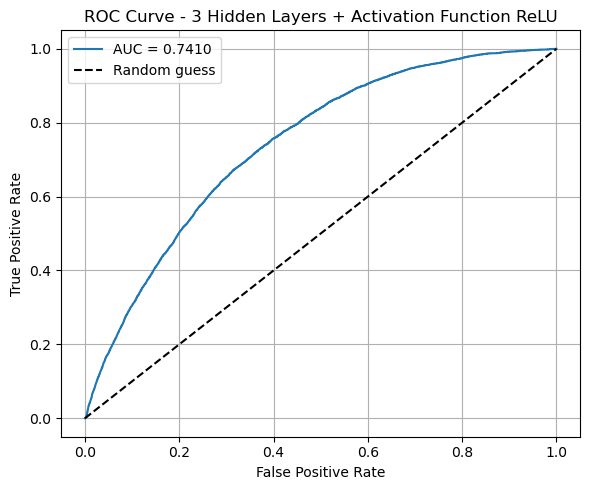

In [48]:
# Question 2: 3 hidden layers + activation function ReLU
import torch
import torch.nn as nn
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split
from IPython import display

seed = 0
random.seed(seed)
torch.manual_seed(seed)

device = torch.device("cpu")

df = pd.read_csv('diabetes - Copy.csv')
df = df.dropna()

for i in range(1, 13):
    df[f'Zodiac_{i}'] = (df['Zodiac'] == i).astype(int)
df['BiologicalSex'] = df['BiologicalSex'] - 1
df = df.drop(['Zodiac', 'Zodiac_1'], axis=1)

train_data, val_data = train_test_split(df, test_size=0.2, random_state=seed)
X_train = train_data.drop('Diabetes', axis=1)
y_train = train_data['Diabetes']
X_val = val_data.drop('Diabetes', axis=1)
y_val = val_data['Diabetes']

continuous_variables = ['BMI','MentalHealth','PhysicalHealth','GeneralHealth','AgeBracket','EducationBracket','IncomeBracket']
mean_std = X_train[continuous_variables].agg(['mean', 'std'], axis=0)
means = mean_std.loc['mean']
stds = mean_std.loc['std']

X_train[continuous_variables] = (X_train[continuous_variables] - means) / stds
X_val[continuous_variables] = (X_val[continuous_variables] - means) / stds
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32, device=device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long, device=device)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32, device=device)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.long, device=device)

D = X_train.shape[1]
C = 2
H = 100
learning_rate = 1e-2
lambda_l2 = 1e-3
num_epochs = 100

model = nn.Sequential(
    nn.Linear(D, H),    
    nn.ReLU(),           
    nn.Linear(H, H),     
    nn.ReLU(), 
    nn.Linear(H, H),     
    nn.ReLU(),           
    nn.Linear(H, C)      
)

counts = torch.bincount(y_train_tensor)
weights = 1.0 / counts
criterion = nn.CrossEntropyLoss(weight=weights)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) # built-in L2

for t in range(num_epochs):
    model.train()
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    
    score, predicted = torch.max(y_pred, 1)
    acc = (predicted == y_train_tensor).sum().item() / len(y_train_tensor)
    
    print(f"[EPOCH {t}] LOSS: {loss.item():.6f} | ACC: {acc:.4f}")
    display.clear_output(wait=True)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

model.eval()
with torch.no_grad():
    y_logits = model(X_val_tensor)
    y_probs = torch.softmax(y_logits, dim=1)[:, 1].cpu().numpy()
    y_true = y_val_tensor.cpu().numpy()
    fpr, tpr, thresholds = roc_curve(y_true, y_probs)
    auc_score = roc_auc_score(y_true, y_probs)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - 3 Hidden Layers + Activation Function ReLU")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

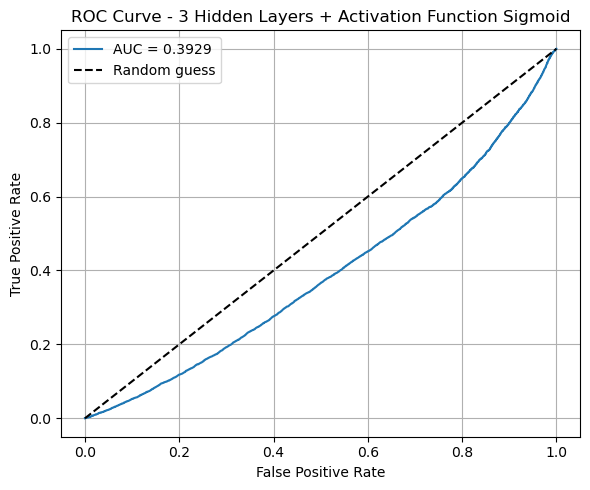

In [50]:
# Question 2: 3 hidden layers + activation function sigmoid
import torch
import torch.nn as nn
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split
from IPython import display

seed = 0
random.seed(seed)
torch.manual_seed(seed)

device = torch.device("cpu")

df = pd.read_csv('diabetes - Copy.csv')
df = df.dropna()

for i in range(1, 13):
    df[f'Zodiac_{i}'] = (df['Zodiac'] == i).astype(int)
df['BiologicalSex'] = df['BiologicalSex'] - 1
df = df.drop(['Zodiac', 'Zodiac_1'], axis=1)

train_data, val_data = train_test_split(df, test_size=0.2, random_state=seed)
X_train = train_data.drop('Diabetes', axis=1)
y_train = train_data['Diabetes']
X_val = val_data.drop('Diabetes', axis=1)
y_val = val_data['Diabetes']

continuous_variables = ['BMI','MentalHealth','PhysicalHealth','GeneralHealth','AgeBracket','EducationBracket','IncomeBracket']
mean_std = X_train[continuous_variables].agg(['mean', 'std'], axis=0)
means = mean_std.loc['mean']
stds = mean_std.loc['std']

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32, device=device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long, device=device)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32, device=device)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.long, device=device)

D = X_train.shape[1]
C = 2
H = 100
learning_rate = 1e-2
lambda_l2 = 1e-3
num_epochs = 100

model = nn.Sequential(
    nn.Linear(D, H),    
    nn.Sigmoid(),           
    nn.Linear(H, H),     
    nn.Sigmoid(), 
    nn.Linear(H, H),     
    nn.Sigmoid(),           
    nn.Linear(H, C)      
)

counts = torch.bincount(y_train_tensor)
weights = 1.0 / counts
criterion = nn.CrossEntropyLoss(weight=weights)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) # built-in L2

for t in range(num_epochs):
    model.train()
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    
    score, predicted = torch.max(y_pred, 1)
    acc = (predicted == y_train_tensor).sum().item() / len(y_train_tensor)
    
    print(f"[EPOCH {t}] LOSS: {loss.item():.6f} | ACC: {acc:.4f}")
    display.clear_output(wait=True)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

model.eval()
with torch.no_grad():
    y_logits = model(X_val_tensor)
    y_probs = torch.softmax(y_logits, dim=1)[:, 1].cpu().numpy()
    y_true = y_val_tensor.cpu().numpy()
    fpr, tpr, thresholds = roc_curve(y_true, y_probs)
    auc_score = roc_auc_score(y_true, y_probs)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - 3 Hidden Layers + Activation Function Sigmoid")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

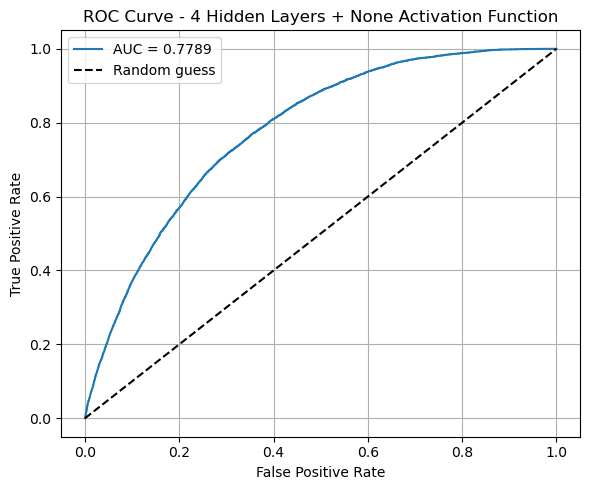

In [40]:
# Question 2: 4 hidden layers + none activation function
import torch
import torch.nn as nn
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split
from IPython import display

seed = 0
random.seed(seed)
torch.manual_seed(seed)

device = torch.device("cpu")

df = pd.read_csv('diabetes - Copy.csv')
df = df.dropna()

for i in range(1, 13):
    df[f'Zodiac_{i}'] = (df['Zodiac'] == i).astype(int)
df['BiologicalSex'] = df['BiologicalSex'] - 1
df = df.drop(['Zodiac', 'Zodiac_1'], axis=1)

train_data, val_data = train_test_split(df, test_size=0.2, random_state=seed)
X_train = train_data.drop('Diabetes', axis=1)
y_train = train_data['Diabetes']
X_val = val_data.drop('Diabetes', axis=1)
y_val = val_data['Diabetes']

continuous_variables = ['BMI','MentalHealth','PhysicalHealth','GeneralHealth','AgeBracket','EducationBracket','IncomeBracket']
mean_std = X_train[continuous_variables].agg(['mean', 'std'], axis=0)
means = mean_std.loc['mean']
stds = mean_std.loc['std']

X_train[continuous_variables] = (X_train[continuous_variables] - means) / stds
X_val[continuous_variables] = (X_val[continuous_variables] - means) / stds

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32, device=device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long, device=device)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32, device=device)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.long, device=device)

D = X_train.shape[1]
C = 2
H = 100
learning_rate = 1e-2
lambda_l2 = 1e-3
num_epochs = 100

model = nn.Sequential(
    nn.Linear(D, H),    
    nn.Identity(),           
    nn.Linear(H, H),     
    nn.Identity(), 
    nn.Linear(H, H),     
    nn.Identity(), 
    nn.Linear(H, H),     
    nn.Identity(), 
    nn.Linear(H, C)      
)

counts = torch.bincount(y_train_tensor)
weights = 1.0 / counts
criterion = nn.CrossEntropyLoss(weight=weights)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) # built-in L2

for t in range(num_epochs):
    model.train()
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    
    score, predicted = torch.max(y_pred, 1)
    acc = (predicted == y_train_tensor).sum().item() / len(y_train_tensor)
    
    print(f"[EPOCH {t}] LOSS: {loss.item():.6f} | ACC: {acc:.4f}")
    display.clear_output(wait=True)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

y_logits = model(X_val_tensor)
y_probs = torch.softmax(y_logits, dim=1)[:, 1].cpu().detach().numpy()
y_true = y_val_tensor.cpu().numpy()
fpr, tpr, thresholds = roc_curve(y_true, y_probs)
auc_score = roc_auc_score(y_true, y_probs)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - 4 Hidden Layers + None Activation Function")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

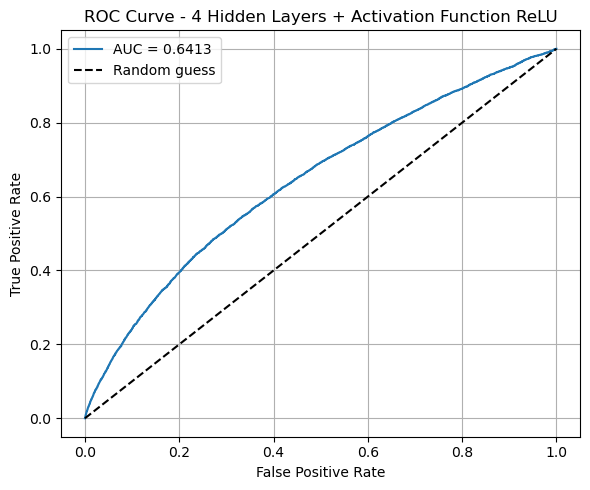

In [44]:
# Question 2: 4 hidden layers + activation function ReLU
import torch
import torch.nn as nn
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split
from IPython import display

seed = 0
random.seed(seed)
torch.manual_seed(seed)

device = torch.device("cpu")

df = pd.read_csv('diabetes - Copy.csv')
df = df.dropna()

for i in range(1, 13):
    df[f'Zodiac_{i}'] = (df['Zodiac'] == i).astype(int)
df['BiologicalSex'] = df['BiologicalSex'] - 1
df = df.drop(['Zodiac', 'Zodiac_1'], axis=1)

train_data, val_data = train_test_split(df, test_size=0.2, random_state=seed)
X_train = train_data.drop('Diabetes', axis=1)
y_train = train_data['Diabetes']
X_val = val_data.drop('Diabetes', axis=1)
y_val = val_data['Diabetes']

continuous_variables = ['BMI','MentalHealth','PhysicalHealth','GeneralHealth','AgeBracket','EducationBracket','IncomeBracket']
mean_std = X_train[continuous_variables].agg(['mean', 'std'], axis=0)
means = mean_std.loc['mean']
stds = mean_std.loc['std']

X_train[continuous_variables] = (X_train[continuous_variables] - means) / stds
X_val[continuous_variables] = (X_val[continuous_variables] - means) / stds

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32, device=device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long, device=device)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32, device=device)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.long, device=device)

D = X_train.shape[1]
C = 2
H = 100
learning_rate = 1e-2
lambda_l2 = 1e-3
num_epochs = 100

model = nn.Sequential(
    nn.Linear(D, H),    
    nn.ReLU(),           
    nn.Linear(H, H),     
    nn.ReLU(), 
    nn.Linear(H, H),     
    nn.ReLU(), 
    nn.Linear(H, H),     
    nn.ReLU(), 
    nn.Linear(H, C)      
)

counts = torch.bincount(y_train_tensor)
weights = 1.0 / counts
criterion = nn.CrossEntropyLoss(weight=weights)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) # built-in L2

for t in range(num_epochs):
    model.train()
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    
    score, predicted = torch.max(y_pred, 1)
    acc = (predicted == y_train_tensor).sum().item() / len(y_train_tensor)
    
    print(f"[EPOCH {t}] LOSS: {loss.item():.6f} | ACC: {acc:.4f}")
    display.clear_output(wait=True)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

y_logits = model(X_val_tensor)
y_probs = torch.softmax(y_logits, dim=1)[:, 1].cpu().detach().numpy()
y_true = y_val_tensor.cpu().numpy()
fpr, tpr, thresholds = roc_curve(y_true, y_probs)
auc_score = roc_auc_score(y_true, y_probs)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - 4 Hidden Layers + Activation Function ReLU")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

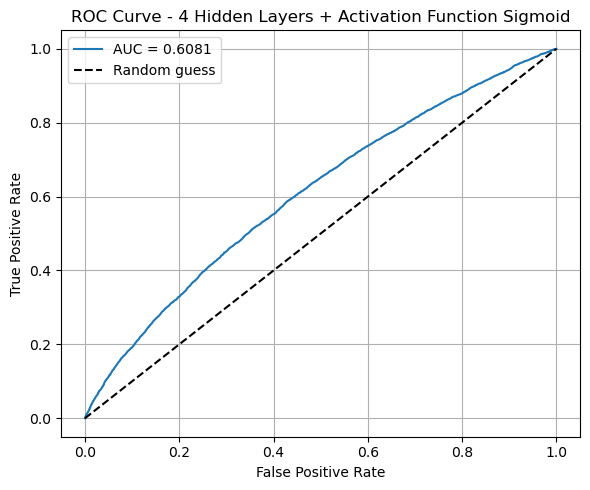

In [11]:
# Question 2: 4 hidden layers + activation function sigmoid
import torch
import torch.nn as nn
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split
from IPython import display

seed = 0
random.seed(seed)
torch.manual_seed(seed)

device = torch.device("cpu")

df = pd.read_csv('diabetes - Copy.csv')
df = df.dropna()

for i in range(1, 13):
    df[f'Zodiac_{i}'] = (df['Zodiac'] == i).astype(int)
df['BiologicalSex'] = df['BiologicalSex'] - 1
df = df.drop(['Zodiac', 'Zodiac_1'], axis=1)

train_data, val_data = train_test_split(df, test_size=0.2, random_state=seed)
X_train = train_data.drop('Diabetes', axis=1)
y_train = train_data['Diabetes']
X_val = val_data.drop('Diabetes', axis=1)
y_val = val_data['Diabetes']

continuous_variables = ['BMI','MentalHealth','PhysicalHealth','GeneralHealth','AgeBracket','EducationBracket','IncomeBracket']
mean_std = X_train[continuous_variables].agg(['mean', 'std'], axis=0)
means = mean_std.loc['mean']
stds = mean_std.loc['std']

X_train[continuous_variables] = (X_train[continuous_variables] - means) / stds
X_val[continuous_variables] = (X_val[continuous_variables] - means) / stds

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32, device=device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long, device=device)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32, device=device)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.long, device=device)

D = X_train.shape[1]
C = 2
H = 100
learning_rate = 1e-2
lambda_l2 = 1e-3
num_epochs = 100

model = nn.Sequential(
    nn.Linear(D, H),    
    nn.Sigmoid(),           
    nn.Linear(H, H),     
    nn.Sigmoid(), 
    nn.Linear(H, H),     
    nn.Sigmoid(), 
    nn.Linear(H, H),     
    nn.Sigmoid(), 
    nn.Linear(H, C)      
)

counts = torch.bincount(y_train_tensor)
weights = 1.0 / counts
criterion = nn.CrossEntropyLoss(weight=weights)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) # built-in L2

for t in range(num_epochs):
    model.train()
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    
    score, predicted = torch.max(y_pred, 1)
    acc = (predicted == y_train_tensor).sum().item() / len(y_train_tensor)
    
    print(f"[EPOCH {t}] LOSS: {loss.item():.6f} | ACC: {acc:.4f}")
    display.clear_output(wait=True)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

y_logits = model(X_val_tensor)
y_probs = torch.softmax(y_logits, dim=1)[:, 1].cpu().detach().numpy()
y_true = y_val_tensor.cpu().numpy()
fpr, tpr, thresholds = roc_curve(y_true, y_probs)
auc_score = roc_auc_score(y_true, y_probs)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - 4 Hidden Layers + Activation Function Sigmoid")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Validation Accuracy: 0.1421


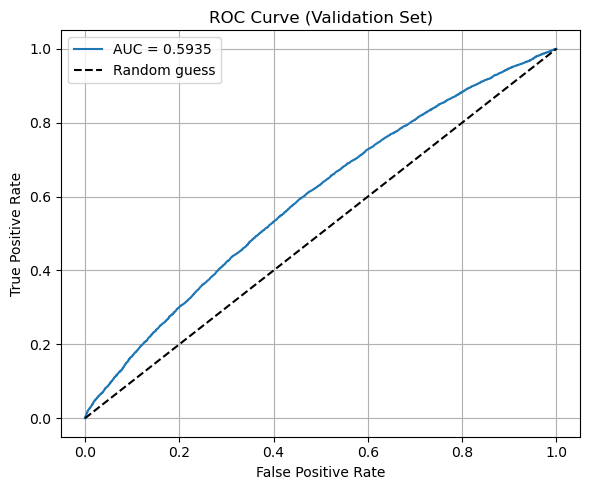

In [90]:
# Question 3: build a deep neural network
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split
from IPython import display
from plot_lib import plot_data, plot_model, set_default

seed = 0
random.seed(seed)
torch.manual_seed(seed)

device = torch.device("cpu")

df = pd.read_csv('diabetes - Copy.csv')
df = df.dropna()

for i in range(1, 13):
    df[f'Zodiac_{i}'] = (df['Zodiac'] == i).astype(int)
df['BiologicalSex'] = df['BiologicalSex'] - 1
df = df.drop(['Zodiac', 'Zodiac_1'], axis=1)

train_data, val_data = train_test_split(df, test_size=0.2, random_state=seed)
X_train = train_data.drop('Diabetes', axis=1)
y_train = train_data['Diabetes']
X_val = val_data.drop('Diabetes', axis=1)
y_val = val_data['Diabetes']

continuous_variables = ['BMI','MentalHealth','PhysicalHealth','GeneralHealth','AgeBracket','EducationBracket','IncomeBracket']
mean_std = X_train[continuous_variables].agg(['mean', 'std'], axis=0)
means = mean_std.loc['mean']
stds = mean_std.loc['std']

X_train[continuous_variables] = (X_train[continuous_variables] - means) / stds
X_val[continuous_variables] = (X_val[continuous_variables] - means) / stds

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32, device=device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long, device=device)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32, device=device)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.long, device=device)

D = X_train.shape[1]
C = 2
H = 100
learning_rate = 1e-2
lambda_l2 = 1e-3

model = nn.Sequential(
    nn.Linear(D, H),
    nn.ReLU(),
    nn.Linear(H, H),     
    nn.ReLU(), 
    nn.Linear(H, H),     
    nn.ReLU(), 
    nn.Linear(H, H),     
    nn.ReLU(), 
    nn.Linear(H, H),     
    nn.ReLU(), 
    nn.Linear(H,C)
    
)

counts = torch.bincount(y_train_tensor)
weights = 1.0 / counts
criterion = nn.CrossEntropyLoss(weight=weights)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) # built-in L2

for t in range(100):
    model.train()
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    score, predicted = torch.max(y_pred, 1)
    acc = (y_train_tensor == predicted).sum().item() / len(y_train_tensor)

    print(f"[EPOCH]: {t}, [LOSS]: {loss.item():.6f}, [ACCURACY]: {acc:.3f}")
    display.clear_output(wait=True)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
model.eval()
with torch.no_grad():
    y_val_logits = model(X_val_tensor)
    _, y_val_predicted = torch.max(y_val_logits, 1)
    val_accuracy = (y_val_predicted == y_val_tensor).sum().item() / len(y_val_tensor)
    print(f"Validation Accuracy: {val_accuracy:.4f}")
    
y_logits = model(X_val_tensor)
y_probs = torch.softmax(y_logits, dim=1)[:, 1].cpu().detach().numpy()
y_true = y_val_tensor.cpu().numpy()
fpr, tpr, thresholds = roc_curve(y_true, y_probs)
auc_score = roc_auc_score(y_true, y_probs)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Validation Set)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Sigmoid (1 layer) | Final RMSE: 6.2002
None (1 layer) | Final RMSE: 8.7798
ReLU (1 layer) | Final RMSE: 7.8241


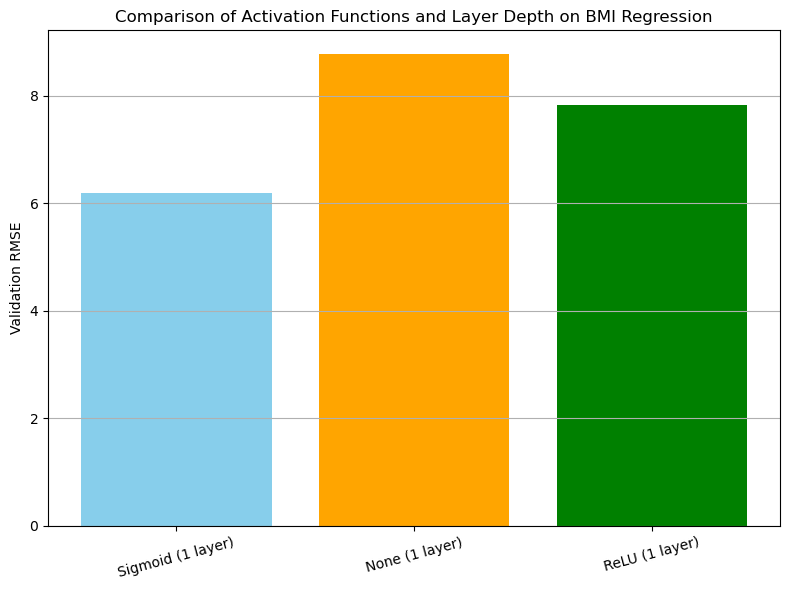

In [75]:
# Question 4: 1 hidden layer RMSE
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from IPython import display

# Set seed
seed = 0
np.random.seed(seed)
torch.manual_seed(seed)

# Load and preprocess data
df = pd.read_csv('diabetes - Copy.csv')
df = df.dropna()
for i in range(1, 13):
    df[f'Zodiac_{i}'] = (df['Zodiac'] == i).astype(int)
df['BiologicalSex'] = df['BiologicalSex'] - 1
df = df.drop(['Zodiac', 'Zodiac_1'], axis=1)

train_data, val_data = train_test_split(df, test_size=0.2, random_state=seed)
X_train = train_data.drop('BMI', axis=1)
y_train = train_data['BMI']
X_val = val_data.drop('BMI', axis=1)
y_val = val_data['BMI']

# Normalize continuous variables
continuous_variables = ['MentalHealth','PhysicalHealth','GeneralHealth','AgeBracket','EducationBracket','IncomeBracket']
mean_std = X_train[continuous_variables].agg(['mean', 'std'], axis=0)
means = mean_std.loc['mean']
stds = mean_std.loc['std']
X_train[continuous_variables] = (X_train[continuous_variables] - means) / stds
X_val[continuous_variables] = (X_val[continuous_variables] - means) / stds

# Convert to tensor
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).view(-1, 1)

# Training settings
D = X_train.shape[1]
H = 100
C = 1
lr = 1e-2
wd = 1e-3
num_epochs = 100

results = {}

# Model configs
models = {
    'Sigmoid (1 layer)': nn.Sequential(
        nn.Linear(D, H), nn.Sigmoid(), nn.Linear(H, C)
    ),
    'None (1 layer)': nn.Sequential(
        nn.Linear(D, H), nn.Identity(), nn.Linear(H, C)
    ),
    'ReLU (1 layer)': nn.Sequential(
        nn.Linear(D, H), nn.ReLU(), nn.Linear(H, C)
    )
}

# Train and evaluate each model
for name, model in models.items():
    criterion = nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr, weight_decay=wd)

    for t in range(num_epochs):
        model.train()
        y_pred = model(X_train_tensor)
        loss = criterion(y_pred, y_train_tensor)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():
        y_val_pred = model(X_val_tensor)
        val_rmse = torch.sqrt(criterion(y_val_pred, y_val_tensor)).item()
        results[name] = val_rmse
        print(f"{name} | Final RMSE: {val_rmse:.4f}")

# Visualization
plt.figure(figsize=(8, 6))
plt.bar(results.keys(), results.values(), color=['skyblue', 'orange', 'green'])
plt.ylabel("Validation RMSE")
plt.title("Comparison of Activation Functions and Layer Depth on BMI Regression")
plt.xticks(rotation=15)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

Sigmoid (1 layer) | Final RMSE: 6.4129
Sigmoid (2 layers) | Final RMSE: 6.5833
Sigmoid (3 layers) | Final RMSE: 6.5860
ReLU (1 layer) | Final RMSE: 7.2519
ReLU (2 layers) | Final RMSE: 6.7066
ReLU (3 layers) | Final RMSE: 6.7274
None (1 layer) | Final RMSE: 7.2849
None (2 layers) | Final RMSE: 6.8155
None (3 layers) | Final RMSE: 6.5703


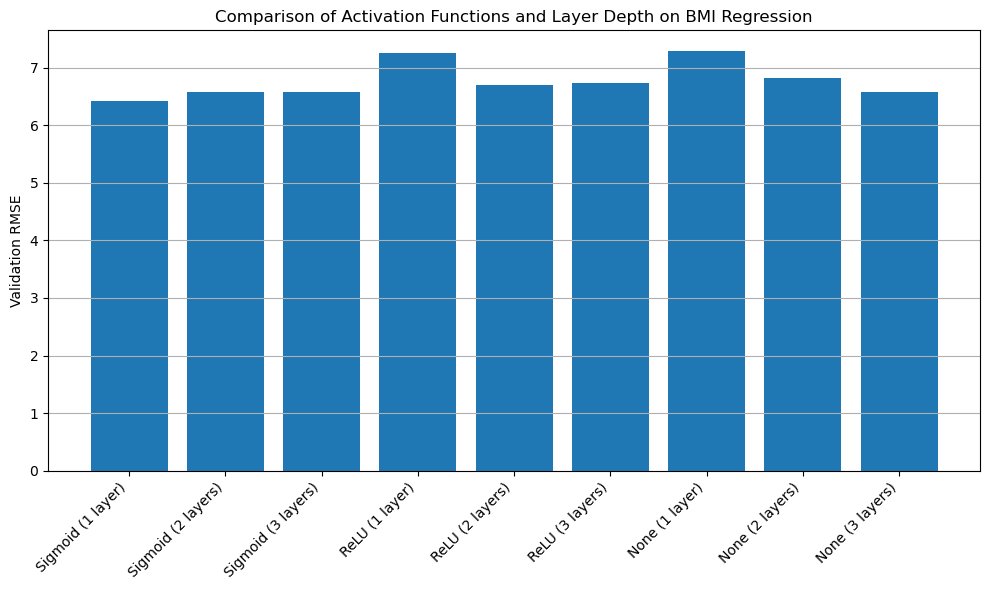

In [77]:
# Question 5: RMSE comparision
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from IPython import display

# Set seed
seed = 0
np.random.seed(seed)
torch.manual_seed(seed)

# Load and preprocess data
df = pd.read_csv('diabetes - Copy.csv')
df = df.dropna()
for i in range(1, 13):
    df[f'Zodiac_{i}'] = (df['Zodiac'] == i).astype(int)
df['BiologicalSex'] = df['BiologicalSex'] - 1
df = df.drop(['Zodiac', 'Zodiac_1'], axis=1)

train_data, val_data = train_test_split(df, test_size=0.2, random_state=seed)
X_train = train_data.drop('BMI', axis=1)
y_train = train_data['BMI']
X_val = val_data.drop('BMI', axis=1)
y_val = val_data['BMI']

# Normalize continuous variables
continuous_variables = ['MentalHealth','PhysicalHealth','GeneralHealth','AgeBracket','EducationBracket','IncomeBracket']
mean_std = X_train[continuous_variables].agg(['mean', 'std'], axis=0)
means = mean_std.loc['mean']
stds = mean_std.loc['std']
X_train[continuous_variables] = (X_train[continuous_variables] - means) / stds
X_val[continuous_variables] = (X_val[continuous_variables] - means) / stds

# Convert to tensor
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).view(-1, 1)

# Training settings
D = X_train.shape[1]
H = 100
C = 1
lr = 1e-3
wd = 1e-3
num_epochs = 100

results = {}

# Model configs
models = {
    'Sigmoid (1 layer)': nn.Sequential(
        nn.Linear(D, H), nn.Sigmoid(), nn.Linear(H, C)
    ),
    'Sigmoid (2 layers)': nn.Sequential(
        nn.Linear(D, H), nn.Sigmoid(),
        nn.Linear(H, H), nn.Sigmoid(),
        nn.Linear(H, C)
    ),
    'Sigmoid (3 layers)': nn.Sequential(
        nn.Linear(D, H), nn.Sigmoid(),
        nn.Linear(H, H), nn.Sigmoid(),
        nn.Linear(H, H), nn.Sigmoid(),
        nn.Linear(H, C)
    ),
    'ReLU (1 layer)': nn.Sequential(
        nn.Linear(D, H), nn.ReLU(), nn.Linear(H, C)
    ),
    'ReLU (2 layers)': nn.Sequential(
        nn.Linear(D, H), nn.ReLU(),
        nn.Linear(H, H), nn.ReLU(),
        nn.Linear(H, C)
    ),
    'ReLU (3 layers)': nn.Sequential(
        nn.Linear(D, H), nn.ReLU(), nn.Dropout(0.5),
        nn.Linear(H, H), nn.ReLU(), nn.Dropout(0.5),
        nn.Linear(H, H), nn.ReLU(), nn.Dropout(0.5),
        nn.Linear(H, C)
    ),
    'None (1 layer)': nn.Sequential(
        nn.Linear(D, H), nn.Identity(), nn.Linear(H, C)
    ),
    'None (2 layers)': nn.Sequential(
        nn.Linear(D, H), nn.Identity(), nn.Dropout(0.5),
        nn.Linear(H, H), nn.Identity(), nn.Dropout(0.5),
        nn.Linear(H, C)
    ),
    'None (3 layers)': nn.Sequential(
        nn.Linear(D, H), nn.Identity(), nn.Dropout(0.5),
        nn.Linear(H, H), nn.Identity(), nn.Dropout(0.5),
        nn.Linear(H, H), nn.Identity(), nn.Dropout(0.5),
        nn.Linear(H, C)
    )
}

# Train and evaluate each model
for name, model in models.items():
    criterion = nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr, weight_decay=wd)

    for t in range(num_epochs):
        model.train()
        y_pred = model(X_train_tensor)
        loss = criterion(y_pred, y_train_tensor)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():
        y_val_pred = model(X_val_tensor)
        val_rmse = torch.sqrt(criterion(y_val_pred, y_val_tensor)).item()
        results[name] = val_rmse
        print(f"{name} | Final RMSE: {val_rmse:.4f}")

# Visualization
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values())
plt.ylabel("Validation RMSE")
plt.title("Comparison of Activation Functions and Layer Depth on BMI Regression")
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

HeavyDrinker             0.116875
HighChol                 0.073888
GeneralHealth            0.029205
BiologicalSex            0.023568
MentalHealth             0.022366
Zodiac_8                 0.001119
Myocardial              -0.030240
Zodiac_3                -0.036547
IncomeBracket           -0.039976
Zodiac_6                -0.041731
HasHealthcare           -0.046126
Zodiac_10               -0.057676
Fruit                   -0.061500
EducationBracket        -0.077051
Zodiac_5                -0.078450
Zodiac_7                -0.093292
Vegetables              -0.093981
Stroke                  -0.098278
PhysicalHealth          -0.099658
Zodiac_2                -0.100545
HardToClimbStairs       -0.103087
PhysActivity            -0.103620
NotAbleToAffordDoctor   -0.103659
Smoker                  -0.109513
AgeBracket              -0.120373
HighBP                  -0.131785
Zodiac_12               -0.153288
BMI                     -0.155634
Zodiac_9                -0.179601
Zodiac_11     

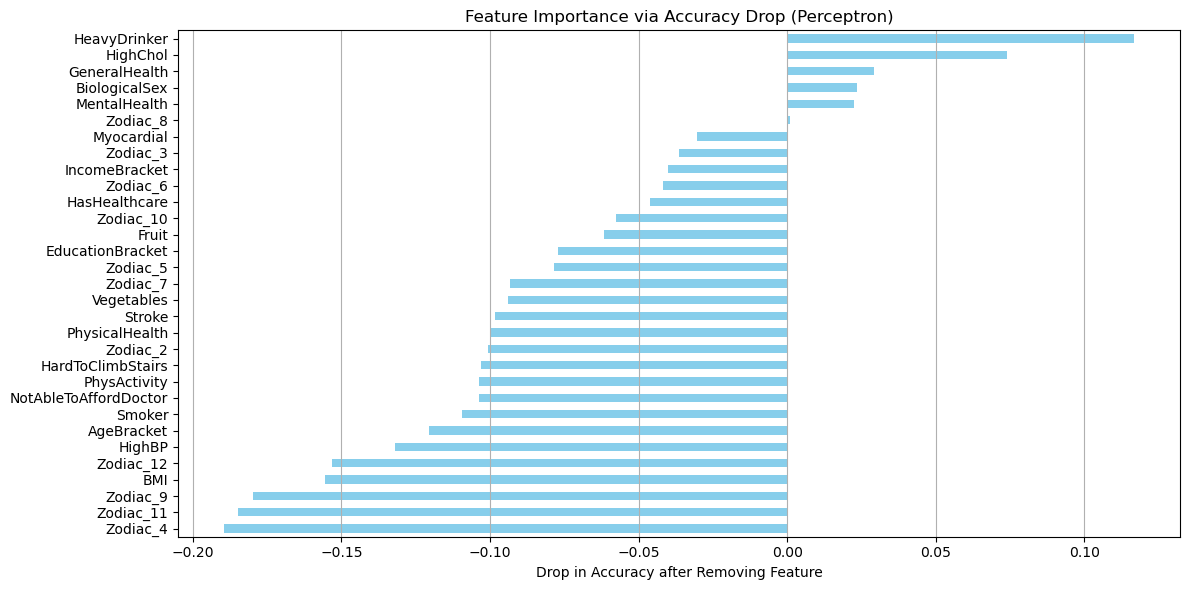

In [3]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random

# Set seed
seed = 0
random.seed(seed)

# Load and preprocess data
df = pd.read_csv('diabetes - Copy.csv')
df = df.dropna()

# One-hot encode Zodiac
for i in range(1, 13):
    df[f'Zodiac_{i}'] = (df['Zodiac'] == i).astype(int)
df['BiologicalSex'] = df['BiologicalSex'] - 1
df = df.drop(['Zodiac', 'Zodiac_1'], axis=1)

# Split
train_data, val_data = train_test_split(df, test_size=0.2, random_state=seed)
X_train = train_data.drop('Diabetes', axis=1)
y_train = train_data['Diabetes']
X_val = val_data.drop('Diabetes', axis=1)
y_val = val_data['Diabetes']

# Normalize
continuous_variables = ['BMI','MentalHealth','PhysicalHealth','GeneralHealth','AgeBracket','EducationBracket','IncomeBracket']
mean_std = X_train[continuous_variables].agg(['mean', 'std'], axis=0)
means = mean_std.loc['mean']
stds = mean_std.loc['std']
X_train[continuous_variables] = (X_train[continuous_variables] - means) / stds
X_val[continuous_variables] = (X_val[continuous_variables] - means) / stds

# Loop over features
accuracy = []
var_label = []
for i in list(X_train.columns):
    clf = Perceptron(tol=1e-3, shuffle=True, class_weight='balanced')
    clf.fit(X_train.drop(i, axis=1), y_train)

    acc = clf.score(X_val.drop(i, axis=1), y_val)
    accuracy.append(0.5975 - acc)  # baseline - new
    var_label.append(str(i))

# Make pandas Series
performance = pd.Series(accuracy, var_label)

# Print top drops
print(performance.sort_values(ascending=False))

# ---- Visualization ----
plt.figure(figsize=(12, 6))
performance.sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.xlabel("Drop in Accuracy after Removing Feature")
plt.title("Feature Importance via Accuracy Drop (Perceptron)")
plt.grid(axis='x')
plt.tight_layout()
plt.show()


In [5]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from IPython import display

seed = 0
random.seed(seed)
torch.manual_seed(seed)

device = torch.device("cpu")
df = pd.read_csv('diabetes - Copy.csv')
df = df.dropna()

for i in range(1, 13):
    df[f'Zodiac_{i}'] = (df['Zodiac'] == i).astype(int)
df['BiologicalSex'] = df['BiologicalSex'] - 1
df = df.drop(['Zodiac', 'Zodiac_1'], axis=1)

train_data, val_data = train_test_split(df, test_size=0.2, random_state=seed)
X_train = train_data.drop('Diabetes', axis=1)
y_train = train_data['Diabetes']
X_val = val_data.drop('Diabetes', axis=1)
y_val = val_data['Diabetes']

continuous_variables = ['BMI','MentalHealth','PhysicalHealth','GeneralHealth','AgeBracket','EducationBracket','IncomeBracket']
mean_std = X_train[continuous_variables].agg(['mean', 'std'], axis=0)
means = mean_std.loc['mean']
stds = mean_std.loc['std']

X_train[continuous_variables] = (X_train[continuous_variables] - means) / stds
X_val[continuous_variables] = (X_val[continuous_variables] - means) / stds

accuracy_drop = []
var_label = []

for i in list(X_train.columns):
    # Drop feature i and retrain model
    X_train_i = X_train.drop(i, axis=1)
    X_val_i = X_val.drop(i, axis=1)

    # Convert to tensors
    X_train_tensor_i = torch.tensor(X_train_i.values, dtype=torch.float32, device=device)
    X_val_tensor_i = torch.tensor(X_val_i.values, dtype=torch.float32, device=device)
    y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
    y_val_tensor = torch.tensor(y_val.values, dtype=torch.long)

    # Create a NEW model for each iteration
    H = 100
    C = 2
    learning_rate = 1e-2
    lambda_l2 = 1e-3
    model = nn.Sequential(
        nn.Linear(X_train_i.shape[1], H),
        nn.ReLU(),
        nn.Linear(H, H),
        nn.ReLU(),
        nn.Linear(H, H),
        nn.ReLU(),
        nn.Linear(H, H),
        nn.ReLU(),
        nn.Linear(H, H),
        nn.ReLU(),
        nn.Linear(H, C)
    )

    counts = torch.bincount(y_train_tensor)
    weights = 1.0 / counts
    criterion = nn.CrossEntropyLoss(weight=weights)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2)

    for t in range(100):
        model.train()
        y_pred = model(X_train_tensor_i)
        loss = criterion(y_pred, y_train_tensor)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluate accuracy
    model.eval()
    with torch.no_grad():
        y_val_pred = model(X_val_tensor_i)
        _, predicted = torch.max(y_val_pred, 1)
        acc = (predicted == y_val_tensor).sum().item() / len(y_val_tensor)

    acc_drop = 0.1421 - acc
    accuracy_drop.append(acc_drop)
    var_label.append(i)
    print(f"Dropped {i}: Validation Acc = {acc:.4f}, Drop = {acc_drop:.4f}")

performance = pd.Series(accuracy_drop, var_label)
print(performance.sort_values(ascending=False))

Dropped HighBP: Validation Acc = 0.1421, Drop = -0.0000
Dropped HighChol: Validation Acc = 0.1425, Drop = -0.0004
Dropped BMI: Validation Acc = 0.7961, Drop = -0.6540
Dropped Smoker: Validation Acc = 0.8579, Drop = -0.7158
Dropped Stroke: Validation Acc = 0.1421, Drop = -0.0000
Dropped Myocardial: Validation Acc = 0.8579, Drop = -0.7158
Dropped PhysActivity: Validation Acc = 0.8579, Drop = -0.7158
Dropped Fruit: Validation Acc = 0.1421, Drop = -0.0000
Dropped Vegetables: Validation Acc = 0.1421, Drop = -0.0000
Dropped HeavyDrinker: Validation Acc = 0.1421, Drop = -0.0000
Dropped HasHealthcare: Validation Acc = 0.1421, Drop = -0.0000
Dropped NotAbleToAffordDoctor: Validation Acc = 0.1421, Drop = -0.0000
Dropped GeneralHealth: Validation Acc = 0.1421, Drop = -0.0000
Dropped MentalHealth: Validation Acc = 0.1421, Drop = -0.0000
Dropped PhysicalHealth: Validation Acc = 0.8579, Drop = -0.7158
Dropped HardToClimbStairs: Validation Acc = 0.8579, Drop = -0.7158
Dropped BiologicalSex: Validatio